#Islamic family created to serve

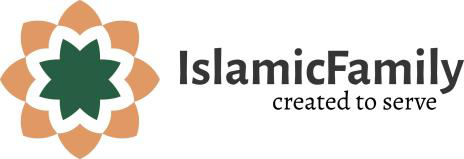

Project Overview
We are collaborating on a machine learning project with a food hamper distribution company. The organization has shared their dataset with us and highlighted a number of challenges they face, such as resource allocation and meeting rising demand. After analyzing their needs, we identified that predicting the number of food hampers to be distributed in the near future could address several of these challenges. **Our project will focus on developing a model to accurately forecast hamper distribution, enabling better planning and resource management for the organization.**

**Data Preparation in Power BI**
Data Type Adjustments: Converted columns to appropriate data types, ensuring that all date and time columns were set to the Short Date format for consistency and ease of analysis.

1.**Removing Unnecessary Columns**: Eliminated columns that were entirely
empty and irrelevant to the analysis, such as "address_complement", "bio", "client_status_more_info", "communication_barrier", "contact_frequency", "emergency_contact_name", "emergency_phone_number", "pets", and "picture".

2.**Merging Datasets**: Merged the datasets on the columns unique_id and unique_client to unify the information from both sources, ensuring no data overlap and enhancing data consistency.

3.**Filling Missing Values for Sex**: Populated missing values in the sex column by referencing data from the sex_new column, enhancing completeness for demographic analysis.

4.**Calculating Age from Birthdate**: Completed missing values in the age column by calculating ages based on the birth_date column, providing accurate age data for further modeling.

## 1. Exploratory Data Analysis (EDA)

### Block 1: Loading and Overview of the Dataset (%20)

In this project, we will perform exploratory data analysis (EDA) on the provided food hamper dataset.


In [22]:
import pandas as pd               #load the dataset
df= pd.read_csv('mergedfoodandclients.csv')

<ipython-input-22-93ea90766fe3>:2: DtypeWarning: Columns (0,1,5,10,14,17,23,29,42,44,45,60,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('mergedfoodandclients.csv')


In [23]:
df.head() #displays the first 5 rows of the dataset.

,agent_collect,agent_collect_note,agent_related,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,collect_token,...,dimensionclients.status,dimensionclients.status_update,dimensionclients.urgent_goal,dimensionclients.worker,dimensionclients.zz_address_txt,dimensionclients.Creation Date,dimensionclients.Modified Date,dimensionclients.Slug,dimensionclients.Creator,dimensionclients.unique id
0,NaN,NaN,1694118506026x195832919403202460,1694118506026x195832919403202460,Food Hamper,NaN,NaN,1696014581917x238266184767837340,2024-09-05,S5AUOQ,...,Active,NaN,no,NaN,"{""street"":""Unit 3, 9515 129B Ave NW"",""city"":""E...",2023-09-29 16:09,2024-01-04 17:20,pod-6335,non_authenticated_user_trnsfrm_live,1696014581917x238266184767837340
1,NaN,NaN,1694118506026x195832919403202460,1694118506026x195832919403202460,Food Hamper,NaN,NaN,1696014581917x238266184767837340,2024-10-05,V7C8U8,...,Active,NaN,no,NaN,"{""street"":""Unit 3, 9515 129B Ave NW"",""city"":""E...",2023-09-29 16:09,2024-01-04 17:20,pod-6335,non_authenticated_user_trnsfrm_live,1696014581917x238266184767837340
2,NaN,NaN,1694118506026x195832919403202460,1694118506026x195832919403202460,Food Hamper,NaN,NaN,1696014581917x238266184767837340,2024-11-05,8MDKDV,...,Active,NaN,no,NaN,"{""street"":""Unit 3, 9515 129B Ave NW"",""city"":""E...",2023-09-29 16:09,2024-01-04 17:20,pod-6335,non_authenticated_user_trnsfrm_live,1696014581917x238266184767837340
3,NaN,NaN,1694118506026x195832919403202460,1694118506026x195832919403202460,Food Hamper,NaN,NaN,1696014581917x238266184767837340,2024-12-05,FZHH12,...,Active,NaN,no,NaN,"{""street"":""Unit 3, 9515 129B Ave NW"",""city"":""E...",2023-09-29 16:09,2024-01-04 17:20,pod-6335,non_authenticated_user_trnsfrm_live,1696014581917x238266184767837340
4,NaN,NaN,1694118506026x195832919403202460,1694118506026x195832919403202460,Food Hamper,NaN,NaN,1696014581917x238266184767837340,2025-01-05,4UYTPG,...,Active,NaN,no,NaN,"{""street"":""Unit 3, 9515 129B Ave NW"",""city"":""E...",2023-09-29 16:09,2024-01-04 17:20,pod-6335,non_authenticated_user_trnsfrm_live,1696014581917x238266184767837340


In [24]:
column_names = df.columns.tolist() #print the column names
print(column_names)

['agent_collect', 'agent_collect_note', 'agent_related', 'appointment_participants', 'appointment_type', 'cal_color', 'client_collected', 'client_list', 'collect_scheduled_date', 'collect_token', 'confirmed', 'contact_method', 'datetime_from', 'datetime_to', 'details', 'g_event_id', 'g_event_link', 'hamper_confirmation_type', 'hamper_type', 'id_xano', 'marked_off', 'meeting_link', 'organization', 'pickup_date', 'pickup_location', 'qrcode', 'quantity', 'related_scheduler', 'staff_invited', 'timezone', 'title', 'unique_client', 'where', 'Creation Date', 'Modified Date', 'Slug', 'Creator', 'unique id', 'dimensionclients.address', 'dimensionclients.address_text', 'dimensionclients.age', 'dimensionclients.birthdates', 'dimensionclients.date_reopened', 'dimensionclients.dependents_qty', 'dimensionclients.english_proficiency_level', 'dimensionclients.external_id', 'dimensionclients.family', 'dimensionclients.household', 'dimensionclients.id_xano', 'dimensionclients.latest_contact_method', 'di

In [25]:
selected_columns = ['collect_scheduled_date','contact_method','datetime_from','pickup_date','unique_client','unique id','dimensionclients.address', 'dimensionclients.age', 'dimensionclients.dependents_qty', 'dimensionclients.family','dimensionclients.status']
df_selected = df[selected_columns]
print(df_selected.head())   # Only taking the necessary columns which are necessary according to our problem.

  collect_scheduled_date contact_method datetime_from pickup_date  \
0             2024-09-05      In-Person     05-Sep-24         NaN   
1             2024-10-05      In-Person     05-Oct-24         NaN   
2             2024-11-05      In-Person     05-Nov-24         NaN   
3             2024-12-05      In-Person     05-Dec-24         NaN   
4             2025-01-05      In-Person     05-Jan-25         NaN   

                      unique_client                         unique id  \
0  1696014581917x238266184767837340  1707160642094x214427230120123330   
1  1696014581917x238266184767837340  1707160647148x188170725513290280   
2  1696014581917x238266184767837340  1707160652015x270451442145056350   
3  1696014581917x238266184767837340  1707160654554x852422130908931500   
4  1696014581917x238266184767837340  1707160657770x481741066254691460   

                        dimensionclients.address  dimensionclients.age  \
0  6608 158 Ave NW, Edmonton, AB T5Z 3H1, Canada                  39.0  

In [26]:
print(df_selected.dtypes)  #checking the datatypes for each column
for column in df_selected.columns:
  print(f"Column '{column}' has data type: {df_selected[column].dtype}")

collect_scheduled_date              object
contact_method                      object
datetime_from                       object
pickup_date                         object
unique_client                       object
unique id                           object
dimensionclients.address            object
dimensionclients.age               float64
dimensionclients.dependents_qty    float64
dimensionclients.family             object
dimensionclients.status             object
dtype: object
Column 'collect_scheduled_date' has data type: object
Column 'contact_method' has data type: object
Column 'datetime_from' has data type: object
Column 'pickup_date' has data type: object
Column 'unique_client' has data type: object
Column 'unique id' has data type: object
Column 'dimensionclients.address' has data type: object
Column 'dimensionclients.age' has data type: float64
Column 'dimensionclients.dependents_qty' has data type: float64
Column 'dimensionclients.family' has data type: object
Column 'dim

In [27]:
missing_values = df_selected.isnull().sum() #checking the missing values
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
collect_scheduled_date                3
contact_method                        0
datetime_from                         1
pickup_date                        9580
unique_client                       119
unique id                             0
dimensionclients.address            804
dimensionclients.age                563
dimensionclients.dependents_qty     226
dimensionclients.family             166
dimensionclients.status             119
dtype: int64


**Dataset Overview**<br>
Total Entries: 16,605 rows<br>
Total Columns: 49 columns<br>
We have removed the columns on the basis of there number of missing values and looking if they are valuable for our problem or not.

### Block 2: Data Cleaning and Preparation (%20)
This step involves preparing the dataset for analysis by handling missing data and ensuring data types
are correctly formatted. In this block, I will:<br>
• Identify and handle missing data.<br>
• Convert date columns to datetime format.<br>
• Handle any duplicates if necessary.<br>

In [28]:
# I choosed to fill these columns with interpolate metrhod as this is a time series data. So, I find interpolate method most suitable for handling missing values.
columns_to_fill = ['dimensionclients.address', 'dimensionclients.age', 'dimensionclients.dependents_qty', 'unique_client', 'dimensionclients.family', 'dimensionclients.status']

for column in columns_to_fill:
  if column in df_selected.columns:
    # Check if the column's data type is numeric before interpolation
    if pd.api.types.is_numeric_dtype(df_selected[column]):
      df_selected[column] = df_selected[column].interpolate(method='linear', limit_direction='both')
    else:
      # For non-numeric columns, use forward fill
      df_selected[column] = df_selected[column].ffill()

print(df_selected.isnull().sum())

collect_scheduled_date                3
contact_method                        0
datetime_from                         1
pickup_date                        9580
unique_client                         0
unique id                             0
dimensionclients.address              0
dimensionclients.age                  0
dimensionclients.dependents_qty       0
dimensionclients.family               0
dimensionclients.status               0
dtype: int64


<ipython-input-28-70605dae95ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = df_selected[column].ffill()
<ipython-input-28-70605dae95ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = df_selected[column].interpolate(method='linear', limit_direction='both')


In [29]:
df_selected['pickup_date'] = pd.to_datetime(df_selected['pickup_date']).dt.strftime('%Y-%m-%d')
df_selected['datetime_from'] = pd.to_datetime(df_selected['datetime_from']).dt.strftime('%Y-%m-%d')
print(df_selected.head())

<ipython-input-29-834761a79599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['pickup_date'] = pd.to_datetime(df_selected['pickup_date']).dt.strftime('%Y-%m-%d')
<ipython-input-29-834761a79599>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected['datetime_from'] = pd.to_datetime(df_selected['datetime_from']).dt.strftime('%Y-%m-%d')


  collect_scheduled_date contact_method datetime_from pickup_date  \
0             2024-09-05      In-Person    2024-09-05         NaN   
1             2024-10-05      In-Person    2024-10-05         NaN   
2             2024-11-05      In-Person    2024-11-05         NaN   
3             2024-12-05      In-Person    2024-12-05         NaN   
4             2025-01-05      In-Person    2025-01-05         NaN   

                      unique_client                         unique id  \
0  1696014581917x238266184767837340  1707160642094x214427230120123330   
1  1696014581917x238266184767837340  1707160647148x188170725513290280   
2  1696014581917x238266184767837340  1707160652015x270451442145056350   
3  1696014581917x238266184767837340  1707160654554x852422130908931500   
4  1696014581917x238266184767837340  1707160657770x481741066254691460   

                        dimensionclients.address  dimensionclients.age  \
0  6608 158 Ave NW, Edmonton, AB T5Z 3H1, Canada                  39.0  

<ipython-input-29-834761a79599>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['datetime_from'] = pd.to_datetime(df_selected['datetime_from']).dt.strftime('%Y-%m-%d')


In [30]:
# Check for duplicate rows
duplicate_rows = df_selected[df_selected.duplicated()]

# Print the duplicate rows if any
if not duplicate_rows.empty:
  print("\nDuplicate Rows:")
  print(duplicate_rows)
else:
  print("\nNo duplicate rows found.")


No duplicate rows found.


In [31]:

df_selected.shape


(16605, 11)

**Data overview:**
<br>
<br>
Data Cleaning with Interpolation: Applied the interpolation method to handle missing values, as this approach is well-suited for time-series datasets, maintaining temporal consistency without introducing abrupt changes in the data.<br>
<br>
Duplicate Check: Conducted a thorough check for duplicate columns across the dataset and confirmed there were none, ensuring data integrity.<br>
<br>
Data Type Adjustments: Adjusted data types for the pickup_date and schedule_date columns to ensure they are correctly formatted as date types, which is essential for time-series analysis and modeling.

### Block 3: Descriptive Statistics (%20)
In this block, we will perform descriptive statistical analysis to get a deeper understanding of the
numerical and categorical columns in the dataset. Since each client may have visited the charity
multiple times, resulting in duplicate records for columns like age, preferred contact method, etc., we
will first deduplicate the data based on the unique_client column.

In [32]:
# Rename 'collect_scheduled_date' column to 'schedule_date'
df_selected = df_selected.rename(columns={'collect_scheduled_date': 'schedule_date'})

# Convert date columns to datetime format.
df_selected['pickup_date'] = pd.to_datetime(df_selected['pickup_date'], errors='coerce')
df_selected['schedule_date'] = pd.to_datetime(df_selected['schedule_date'], errors='coerce')

# Group by date to count the number of events for each date and rename the resulting series
pickup_series = df_selected.groupby(df_selected['pickup_date'].dt.date).size().rename('actual_pickup')
schedule_series = df_selected.groupby(df_selected['schedule_date'].dt.date).size().rename('scheduled_pickup')

# Display the first few entries of each series to verify
print("Actual Pickup Counts by Date:\n", pickup_series.head())
print("\nScheduled Pickup Counts by Date:\n", schedule_series.head())

Actual Pickup Counts by Date:
 pickup_date
2023-07-27    1
2023-08-01    1
2023-08-22    1
2023-08-23    1
2023-09-07    1
Name: actual_pickup, dtype: int64

Scheduled Pickup Counts by Date:
 schedule_date
2023-07-27    2
2023-08-01    1
2023-08-22    1
2023-08-23    1
2023-08-26    2
Name: scheduled_pickup, dtype: int64


In [33]:
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-26')
prediction_dates=pd.date_range(start=start_date, end=end_date, freq='D')
pickup_series = pickup_series.reindex(prediction_dates, fill_value=0)
schedule_series = schedule_series.reindex(prediction_dates, fill_value=0)

# Create the merged time series DataFrame
merged_time_series = pd.DataFrame({
    'date': prediction_dates,
    'actual_pickup': pickup_series.values,
    'scheduled_pickup': schedule_series.values
})

print(merged_time_series.head())

        date  actual_pickup  scheduled_pickup
0 2023-11-01             16                15
1 2023-11-02              0                 1
2 2023-11-03              0                 0
3 2023-11-04              0                 1
4 2023-11-05              0                 0


In [34]:

merged_time_series.shape

(300, 3)

In [35]:
df_deduplicated = df_selected.drop_duplicates(subset='unique_client', keep='first')

# Generate descriptive statistics for numerical columns
numerical_cols = df_deduplicated.select_dtypes(include=['number'])
print(numerical_cols.describe())

       dimensionclients.age  dimensionclients.dependents_qty
count           1051.000000                      1051.000000
mean              42.879580                         3.766182
std               12.609351                         2.296133
min                0.000000                         0.000000
25%               34.000000                         2.000000
50%               41.000000                         4.000000
75%               50.000000                         5.000000
max               86.000000                        12.000000


In [36]:
# Display frequency of categories for categorical columns
categorical_cols = df_deduplicated.select_dtypes(exclude=['number', 'datetime64[ns]'])
for col in categorical_cols:
    print(f"\nFrequency of categories for '{col}':")
    print(df_deduplicated[col].value_counts())


Frequency of categories for 'contact_method':
contact_method
In-Person    1051
Name: count, dtype: int64

Frequency of categories for 'datetime_from':
datetime_from
2024-02-29    24
2024-06-29    18
2024-03-29    18
2023-11-06    17
2024-08-27    15
              ..
2024-10-29     1
2024-10-26     1
2024-10-03     1
2024-11-04     1
2023-10-30     1
Name: count, Length: 295, dtype: int64

Frequency of categories for 'unique_client':
unique_client
1696014581917x238266184767837340    1
1696013580607x402119905435126500    1
1696014571852x526793537995918100    1
1696014571219x551463960539515700    1
1696014831786x143613391521361330    1
                                   ..
1696018498467x780115208085383700    1
1696013576508x735366610051467500    1
1696013587030x658736871185801040    1
1696015562072x777279916803172100    1
1696015552346x157596164386512260    1
Name: count, Length: 1051, dtype: int64

Frequency of categories for 'unique id':
unique id
1707160642094x214427230120123330    1


**Documemt insights:**
<br>
1. Identifying Useful Data Range: Through bar graphs comparing actual_pickups vs. date and scheduled_pickups vs. date, we observed that data from November 2023 to August 2024 provides the most reliable insights. Data outside this range appears to contain outliers and may not accurately represent distribution patterns, so this subset will be used for model training.
2. In exploring the dataset, we identified that the "pickup_date" and "schedule_date" columns hold critical information for our analysis. These columns directly relate to the number of hampers distributed on specific dates, making them valuable predictors for our modeling goal.

3. To facilitate analysis, we created a new DataFrame focusing on these two columns and aggregated the data to calculate the number of pickups per date. This refined view will serve as the basis for our predictive modeling, allowing us to forecast future demand more accurately.

### Block 4: Data Visualization (%20)
This step focuses on visualizing the data to identify patterns, distributions, and possible outliers.

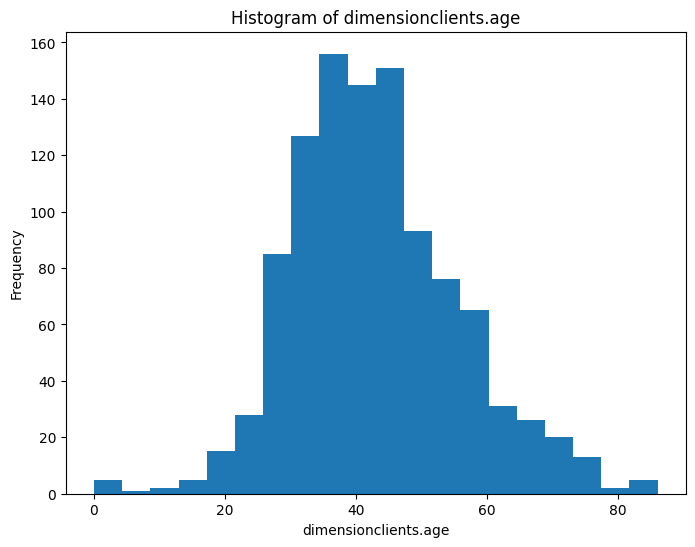

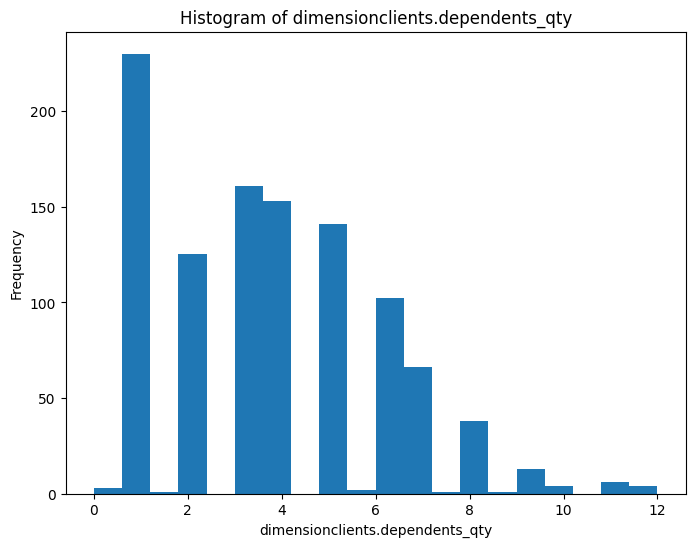

In [37]:
#creating histograms for numerical columns.
import pandas as pd
import matplotlib.pyplot as plt
df_deduplicated = df_selected.drop_duplicates(subset='unique_client', keep='first')
numerical_cols = df_deduplicated.select_dtypes(include=['number'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.hist(df_deduplicated[col].dropna(), bins=20)  # Use dropna to handle potential NaN values
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

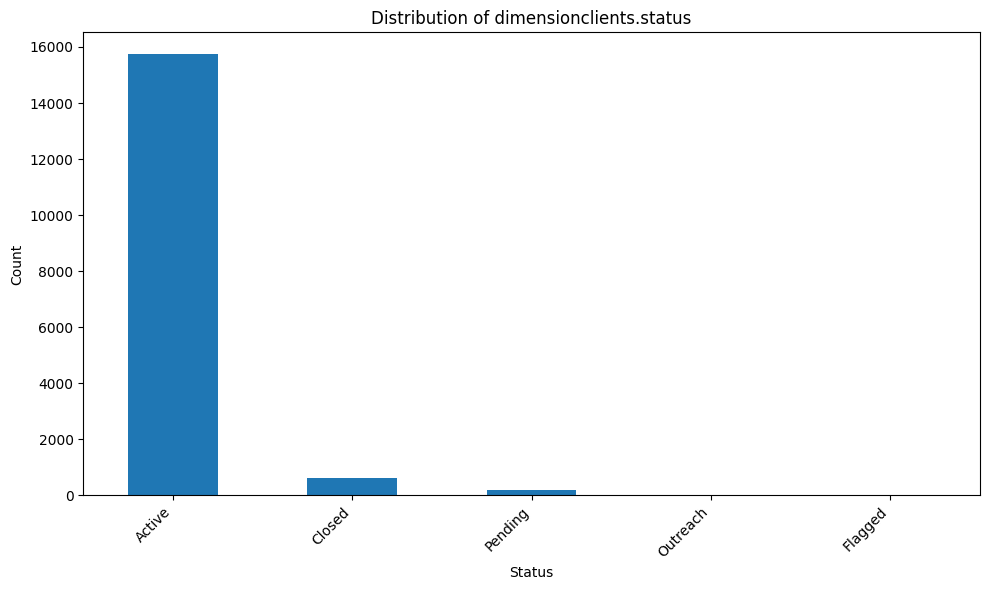

In [38]:
# Create the bar chart
plt.figure(figsize=(10, 6))
df_selected['dimensionclients.status'].value_counts().plot(kind='bar')
plt.title('Distribution of dimensionclients.status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

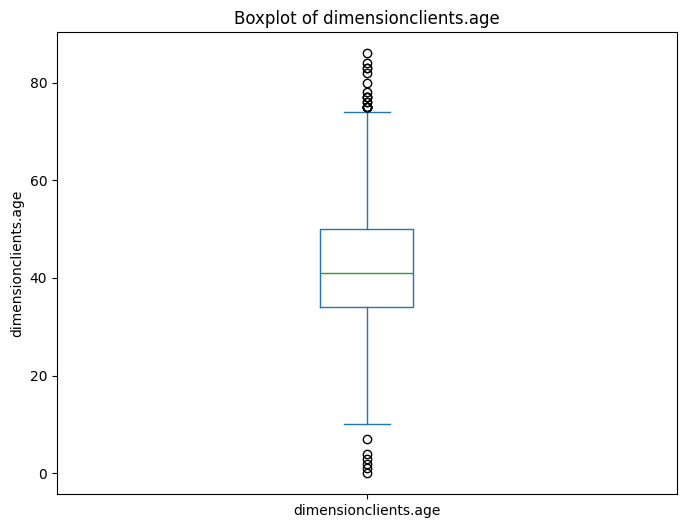

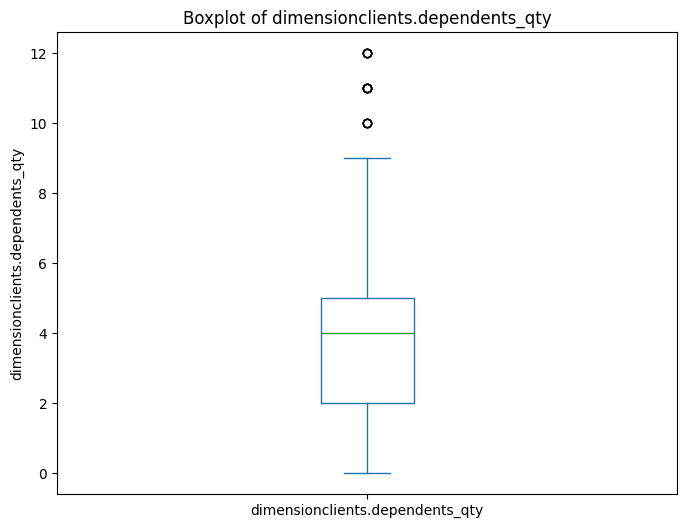

In [39]:
# Boxplots for numerical columns to identify outliers
numerical_cols = df_deduplicated.select_dtypes(include=['number'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df_deduplicated[col].dropna().plot(kind='box')  # Use dropna to handle potential NaN values
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

### Block 5: Feature Relationships (%20)


In [40]:
# Calculate hamper demand as the number of visits per client
hamper_demand = df_selected.groupby('unique_client')['pickup_date'].count().reset_index()
hamper_demand.rename(columns={'pickup_date': 'hamper_demand'}, inplace=True)

# Merge the hamper demand back into the main DataFrame
df_selected = pd.merge(df_selected, hamper_demand, on='unique_client', how='left')

print(df_selected.head())

  schedule_date contact_method datetime_from pickup_date  \
0    2024-09-05      In-Person    2024-09-05         NaT   
1    2024-10-05      In-Person    2024-10-05         NaT   
2    2024-11-05      In-Person    2024-11-05         NaT   
3    2024-12-05      In-Person    2024-12-05         NaT   
4    2025-01-05      In-Person    2025-01-05         NaT   

                      unique_client                         unique id  \
0  1696014581917x238266184767837340  1707160642094x214427230120123330   
1  1696014581917x238266184767837340  1707160647148x188170725513290280   
2  1696014581917x238266184767837340  1707160652015x270451442145056350   
3  1696014581917x238266184767837340  1707160654554x852422130908931500   
4  1696014581917x238266184767837340  1707160657770x481741066254691460   

                        dimensionclients.address  dimensionclients.age  \
0  6608 158 Ave NW, Edmonton, AB T5Z 3H1, Canada                  39.0   
1  6608 158 Ave NW, Edmonton, AB T5Z 3H1, Canada    

In [41]:
correlations = df_selected[['hamper_demand', 'dimensionclients.age', 'dimensionclients.dependents_qty']].corr()
correlations

,hamper_demand,dimensionclients.age,dimensionclients.dependents_qty
hamper_demand,1.000000,0.173127,0.072676
dimensionclients.age,0.173127,1.000000,-0.147758
dimensionclients.dependents_qty,0.072676,-0.147758,1.000000


## 2. Feature Engineering Guide

### Block 1: Understanding Your Problem & Data (%20)
Before feature engineering, it’s essential to understand the problem and explore the data available to
you. Whether you are predicting demand, classifying client retention, or performing spatiotemporal
analysis, your features should align with the problem's context.

In this project, our target variable is actual_pickup, representing the number of hampers distributed on each date. Given that this data is in a time-series format, we’ll approach modeling with methods that account for chronological order, allowing us to make accurate predictions about future hamper demand based on historical trends.

Event-Based Analysis with the Islamic Calendar:<br>
We identified an opportunity to enhance our analysis by incorporating an Islamic calendar to understand the relationship between religious events and food hamper demand. By loading the calendar and tracking the number of events in each month, we can visualize and analyze whether the increase in events correlates with an increase in actual pickups. This insight could provide valuable context for anticipating demand patterns around specific times, such as religious holidays.

We will give brief summary of why we used these specific columns.<br>
collect_scheduled_date,contact_method	datetime_from,	pickup_date,	unique_client,	unique id,	dimensionclients.address,	dimensionclients.age,	dimensionclients.dependents_qty,	dimensionclients.family,	dimensionclients.status.


### Block 2: Creating Time-Based Features (%20)
Time-based features are crucial for demand forecasting and retention. These features help capture
seasonality, special events, and time-based patterns in behavior



In [42]:
df=merged_time_series.copy()
df

,date,actual_pickup,scheduled_pickup
0,2023-11-01,16,15
1,2023-11-02,0,1
2,2023-11-03,0,0
3,2023-11-04,0,1
4,2023-11-05,0,0
...,...,...,...
295,2024-08-22,51,51
296,2024-08-23,4,32
297,2024-08-24,0,22
298,2024-08-25,0,31


ADF Statistic: -4.442359765825472
p-value: 0.00024957977700468037


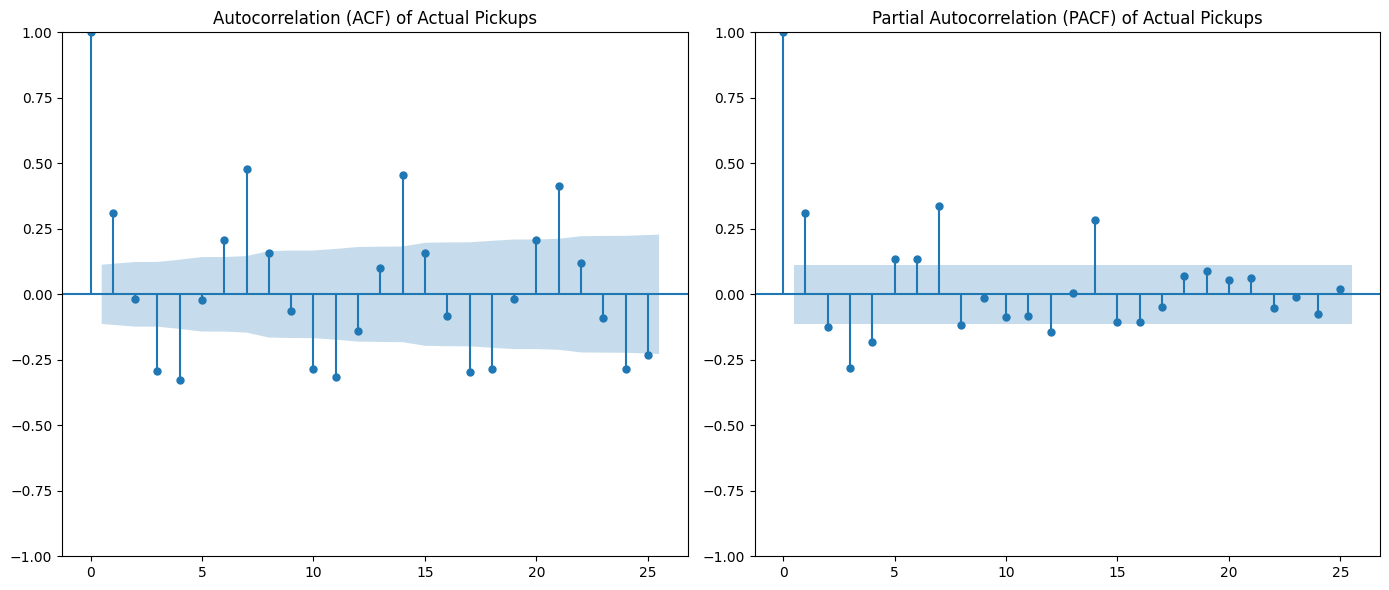

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Step 1: Perform the Augmented Dickey-Fuller (ADF) Test to check for stationarity
# This helps determine if differencing is needed to make the data stationary
adf_result = adfuller(df['actual_pickup'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
# If the p-value > 0.05, the data is non-stationary, and differencing may be needed

# Step 2: Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
# These plots help to understand the correlation structure of the data for ARIMA modeling
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['actual_pickup'], ax=plt.gca(), title="Autocorrelation (ACF) of Actual Pickups")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['actual_pickup'], ax=plt.gca(), title="Partial Autocorrelation (PACF) of Actual Pickups")

# Display the plots
plt.tight_layout()
plt.show()



**Weekly Seasonality Insight:**<BR>
Based on the autocorrelation graph, we observed that our data demonstrates weekly seasonality. In the graph, lags at intervals of 7, 14, and 21 are outside the blue confidence region, indicating significant correlation at these points. This suggests that the demand for food hampers follows a weekly pattern, likely influenced by specific weekly routines or recurring needs.

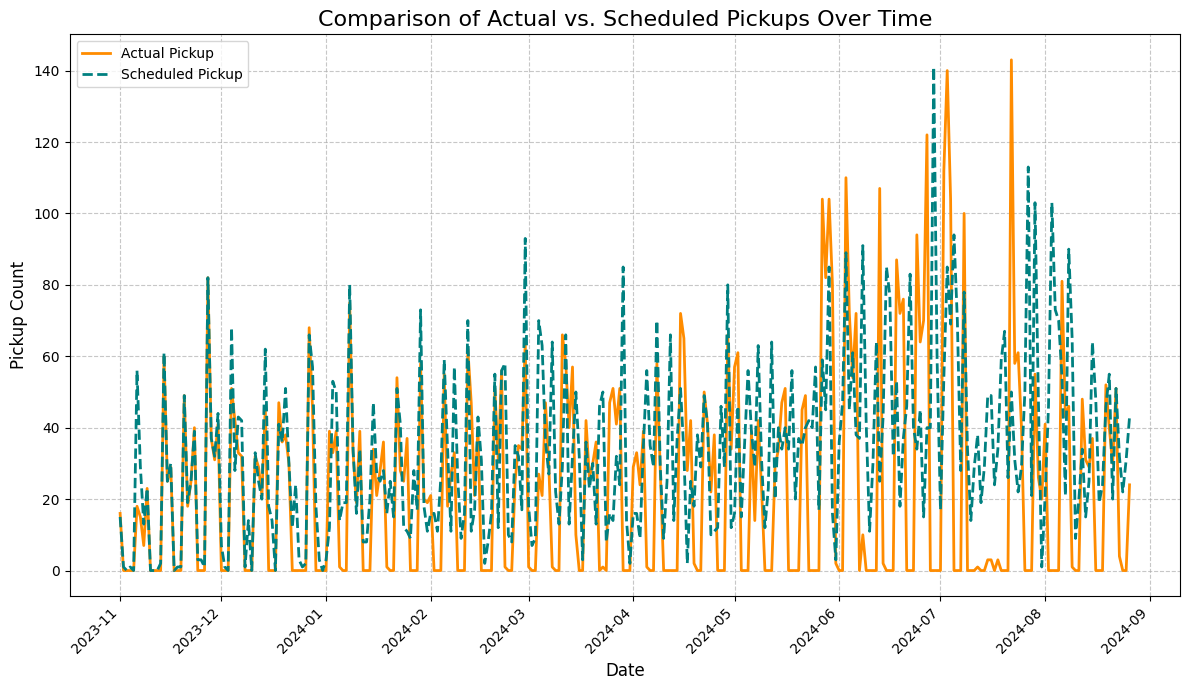

In [44]:
import matplotlib.pyplot as plt

# Create a figure and axis with a custom size
plt.figure(figsize=(12, 7))

# Plot the actual pickups over time with a new color scheme
plt.plot(merged_time_series['date'], merged_time_series['actual_pickup'], label='Actual Pickup', color='darkorange', linestyle='-', linewidth=2)

# Plot the scheduled pickups over time with a complementary color
plt.plot(merged_time_series['date'], merged_time_series['scheduled_pickup'], label='Scheduled Pickup', color='teal', linestyle='--', linewidth=2)

# Set title and labels with a more descriptive title
plt.title('Comparison of Actual vs. Scheduled Pickups Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pickup Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legend with a clearer location and grid for easier visualization
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Ensures the layout fits within the figure area
plt.show()


**Scheduled vs. Actual Pickups Over Time:**<br>
A line graph was plotted to compare scheduled pickups and actual pickups on specific dates. This visualization allows us to observe discrepancies or patterns between planned and actual hamper distributions. It can reveal days where actual pickups exceeded or fell short of scheduled pickups, highlighting potential areas for operational adjustments or forecasting improvements.

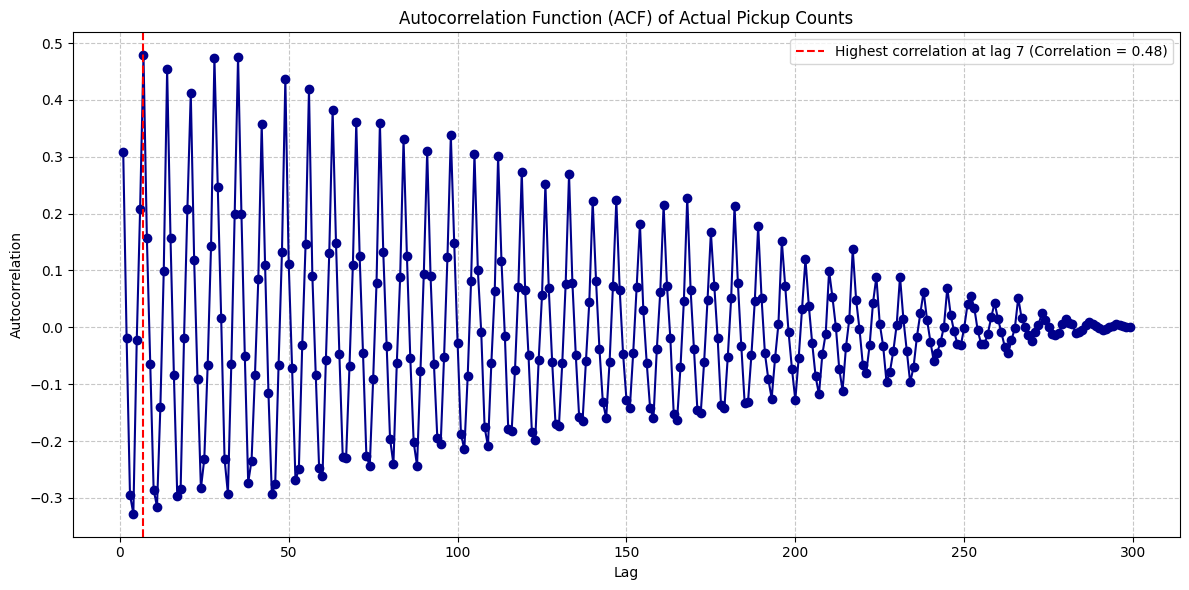

Lag with highest correlation: 7
Correlation value: 0.4785674630885195


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
# Calculate the autocorrelation function (ACF) for the 'actual_pickup' column
# `nlags=len(df) - 1` computes ACF up to the maximum lag in the dataset
acf_values = acf(df['actual_pickup'], nlags=len(df) - 1)

# Identify the lag with the highest absolute autocorrelation (excluding lag 0)
highest_correlation = 0
highest_lag = 0
for lag, correlation in enumerate(acf_values[1:], start=1):  # Skip lag 0
    if abs(correlation) > abs(highest_correlation):
        highest_correlation = correlation
        highest_lag = lag  # Adjust index to account for skipping lag 0

# Plot the ACF values as a line graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(acf_values)), acf_values[1:], color='darkblue', marker='o')  # Exclude lag 0

# Customize plot labels and title
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Actual Pickup Counts')

# Highlight the lag with the highest correlation
plt.axvline(x=highest_lag, color='red', linestyle='--',
            label=f'Highest correlation at lag {highest_lag} (Correlation = {highest_correlation:.2f})')

# Add legend and grid for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensures proper spacing
plt.show()

# Print the highest correlation and corresponding lag
print(f"Lag with highest correlation: {highest_lag}")
print(f"Correlation value: {highest_correlation}")


**Lagging Insights:**<br>
From the autocorrelation function (ACF) test, we observed a high correlation at a lag of 7, confirming the weekly seasonality in our data. Based on these results, we decided to incorporate lagged features with a lag of 7, which will help capture the weekly patterns more effectively in our predictive model. This step is crucial for enhancing the model’s ability to forecast future hamper pickups accurately.

### Block 3: Client/Household-Based Features (%20).

In [46]:
# Group data by 'unique_client' and calculate total visits and time between visits
client_visits = df_selected.groupby('unique_client')['pickup_date'].agg(['count', lambda x: (x.max() - x.min()).days])

# Rename the aggregated columns for clarity
client_visits.rename(columns={'count': 'total_visits', '<lambda_0>': 'days_between_visits'}, inplace=True)

# Display the results
print(client_visits.head())

                                  total_visits  days_between_visits
unique_client                                                      
1669658091582x874637848970788900             2                 13.0
1673043106565x702758294392930300             6                100.0
1686780032991x462370984017264640             4                105.0
1689345689019x623399745786478600             3                 76.0
1694115474357x134699341188431870             4                223.0


In [47]:

def create_rolling_window_features(df, window_size):
    """
    Creates rolling window features for the given DataFrame.

    Args:
        df: Input DataFrame with 'date' and 'actual_pickup' columns.
        window_size: Size of the rolling window (e.g., 90 days for 3 months).

    Returns:
        DataFrame with added rolling window features.
    """

    # Ensure 'date' column is datetime
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' as index for rolling calculations
    df = df.set_index('date')

    # Calculate rolling sum
    df['rolling_sum'] = df['actual_pickup'].rolling(window=window_size, min_periods=1).sum()

    # Calculate rolling mean
    df['rolling_mean'] = df['actual_pickup'].rolling(window=window_size, min_periods=1).mean()

    # Reset index to have the 'date' as a regular column
    df = df.reset_index()

    return df


# Example usage (3-month rolling window)
window_size = 90  # 90 days for 3 months
df_with_features = create_rolling_window_features(df.copy(), window_size)
print(df_with_features.head())

        date  actual_pickup  scheduled_pickup  rolling_sum  rolling_mean
0 2023-11-01             16                15         16.0     16.000000
1 2023-11-02              0                 1         16.0      8.000000
2 2023-11-03              0                 0         16.0      5.333333
3 2023-11-04              0                 1         16.0      4.000000
4 2023-11-05              0                 0         16.0      3.200000


### Block 4: Geospatial Features (%20)


**Geographic Insights:**<br>
After examining the map, I observed that a significant portion of Edmonton’s Islamic community resides in the north region (notably in the Castledown area) and in downtown Edmonton. This concentration of residents could influence the distribution and demand for food hampers in these areas.

This information can help in targeted planning and resource allocation, ensuring that services are readily available in areas with higher demand

### Block 5: Understanding Feature Relationships (Correlation Analysis & Visualization)(%20)

                  actual_pickup  scheduled_pickup
actual_pickup          1.000000          0.347305
scheduled_pickup       0.347305          1.000000


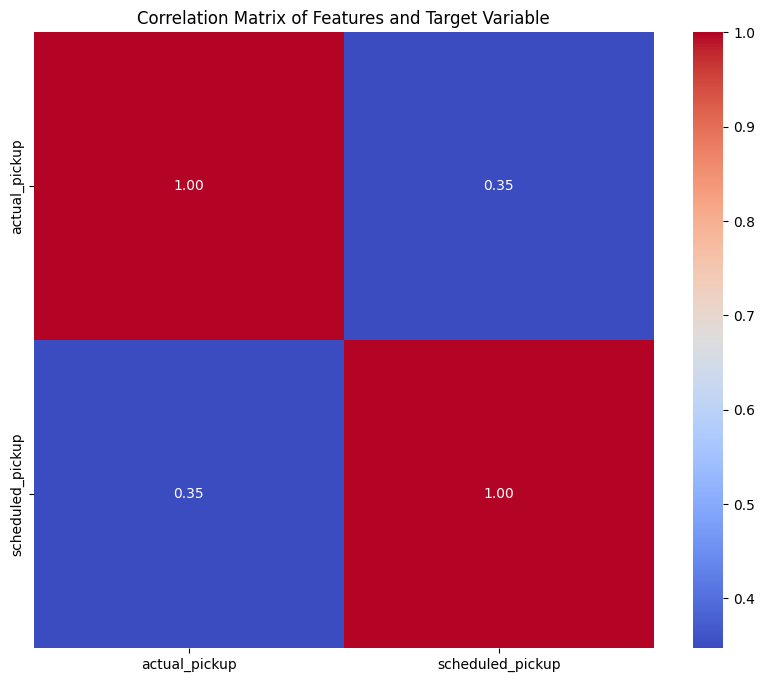

In [48]:
correlation_matrix = df.corr(numeric_only=True)

# Print or visualize the correlation matrix
print(correlation_matrix)

# You can also visualize it using a heatmap (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

Pearson Correlation between Actual and Scheduled Pickups: 0.3473046002653925


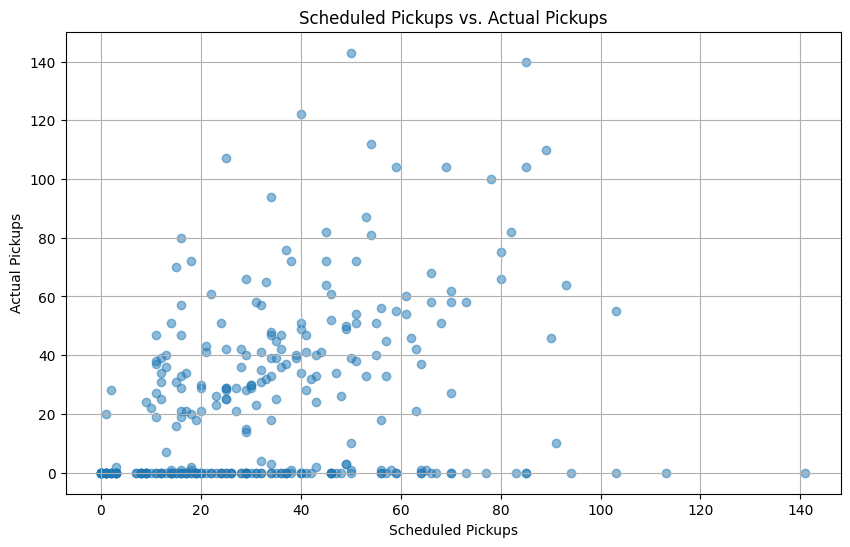

In [49]:
# Calculate and print Pearson correlation between 'actual_pickup' and 'scheduled_pickup'
# Pearson correlation quantifies the linear relationship between the two series
cross_correlation = df['actual_pickup'].corr(df['scheduled_pickup'])
print("Pearson Correlation between Actual and Scheduled Pickups:", cross_correlation)
plt.figure(figsize=(10, 6))
plt.scatter(df['scheduled_pickup'], df['actual_pickup'], alpha=0.5)
plt.title('Scheduled Pickups vs. Actual Pickups')
plt.xlabel('Scheduled Pickups')
plt.ylabel('Actual Pickups')
plt.grid(True)
plt.show()

## ML Modeling & Optimization Guide
In this lab, you will focus on training machine learning models and optimizing them based on the time-series prediction problem or other tasks you have defined at the start of the course. The model training process will vary depending on your problem (e.g., overall demand prediction, client retention, or geographic demand forecasting).

### Block 1: Feature Review & Enhancement (%25)
This block is provided to allow you to refine and improve your features as needed during your iterative model training process.

ADF Statistic: -4.442359765825472
p-value: 0.00024957977700468037
Box-Cox Lambda: -0.04778415512333152


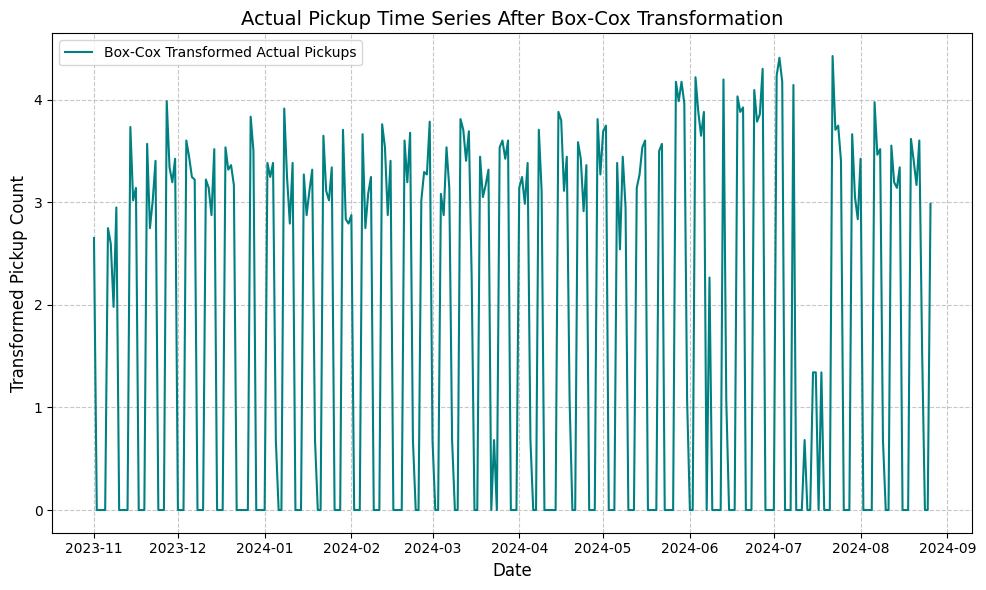

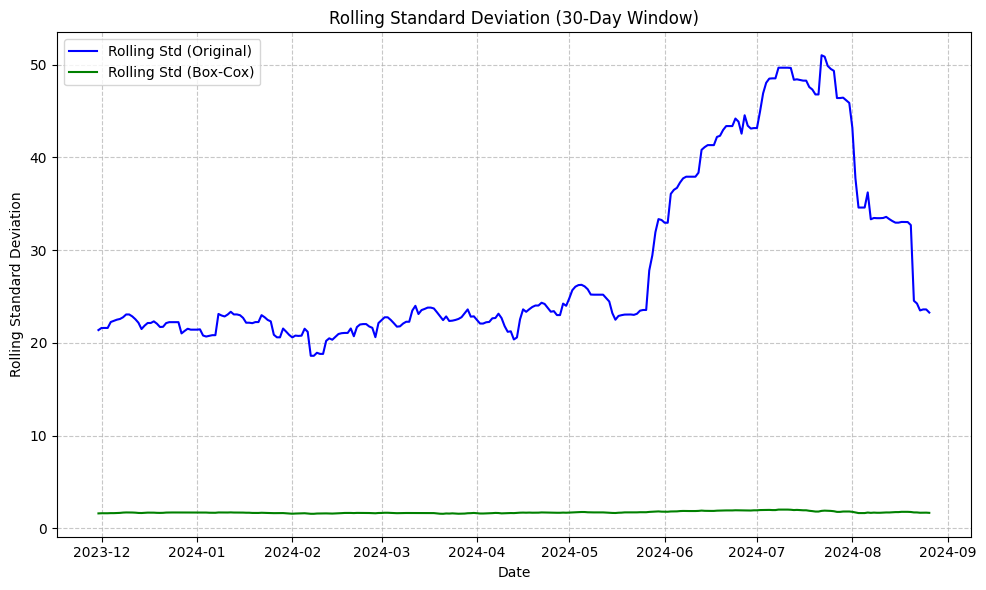

In [50]:
adf_result = adfuller(df['actual_pickup'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
# If the p-value > 0.05, the data is non-stationary, and differencing may be needed
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy import stats
from scipy.special import inv_boxcox

# Apply Box-Cox transformation to the 'actual_pickup' series
# Box-Cox helps stabilize variance and make data more normal, which can be useful for certain analyses and models
# Adding 1 to the 'actual_pickup' values avoids issues with zero or negative values in the transformation
df['actual_pickup_boxcox'], lam = stats.boxcox(df['actual_pickup'] + 1)

# Print the lambda parameter (λ) from the Box-Cox transformation
# Lambda indicates the power parameter used in the transformation, affecting how data is scaled
print(f"Box-Cox Lambda: {lam}")
import matplotlib.pyplot as plt

# Plot the Box-Cox transformed 'actual_pickup' time series
plt.figure(figsize=(10, 6))

# Plot with a teal color for a visually appealing look
plt.plot(df['date'], df['actual_pickup_boxcox'], color='teal', label='Box-Cox Transformed Actual Pickups')

# Add title and axis labels to the plot for clarity
plt.title('Actual Pickup Time Series After Box-Cox Transformation', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transformed Pickup Count', fontsize=12)

# Add grid and legend to enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
# Calculate the 30-day rolling standard deviation for both the original and Box-Cox transformed series
# This helps observe the variance stabilization effect of the Box-Cox transformation
df['rolling_std_original'] = df['actual_pickup'].rolling(window=30).std()
df['rolling_std_boxcox'] = df['actual_pickup_boxcox'].rolling(window=30).std()

# Plot the rolling standard deviation for both series to compare variance stabilization
plt.figure(figsize=(10, 6))

# Plot rolling standard deviation of the original series
plt.plot(df['date'], df['rolling_std_original'], label='Rolling Std (Original)', color='blue')

# Plot rolling standard deviation of the Box-Cox transformed series in green for differentiation
plt.plot(df['date'], df['rolling_std_boxcox'], label='Rolling Std (Box-Cox)', color='green')

# Set title and axis labels for clarity
plt.title('Rolling Standard Deviation (30-Day Window)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')

# Add legend to distinguish between the two series
plt.legend()

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


**Stationarity Analysis and Transformation:**<br>
To determine if our data is stationary, we performed the Augmented Dickey-Fuller (ADF) test. The test yielded a p-value less than 0.05, indicating that the data is likely stationary with respect to its mean. However, observing the graph, we noted that while the mean has stabilized, the variance remained inconsistent.

To address the variance instability, we applied the Box-Cox transformation. This method helps to stabilize variance, making the data more suitable for time-series modeling by reducing the effect of fluctuating variance on model performance.

In [51]:
# Create lagged versions of the 'scheduled_pickup' feature
# Shifting by 7 and 14 days to create 7-day and 14-day lagged values
df['scheduled_pickup_lag_7'] = df['scheduled_pickup'].shift(-7)
df['scheduled_pickup_lag_14'] = df['scheduled_pickup'].shift(-14)

# Forward fill any resulting missing values in these lagged columns
# This is useful to ensure continuity for later modeling or analysis
df[['scheduled_pickup', 'scheduled_pickup_lag_7', 'scheduled_pickup_lag_14']] = \
    df[['scheduled_pickup', 'scheduled_pickup_lag_7', 'scheduled_pickup_lag_14']].ffill()
# Generate lagged features for the Box-Cox transformed 'actual_pickup' data

# Create a 7-day lag for 'actual_pickup_boxcox', shifting values back by 7 days
df['actual_pickup_boxcox_lag_7'] = df['actual_pickup_boxcox'].shift(-7)

# Create a 14-day lag for 'actual_pickup_boxcox', shifting values back by 14 days
df['actual_pickup_boxcox_lag_14'] = df['actual_pickup_boxcox'].shift(-14)

# Fill any missing values generated by the shift operation using forward fill
df[['actual_pickup_boxcox_lag_7', 'actual_pickup_boxcox_lag_14']] = df[['actual_pickup_boxcox_lag_7', 'actual_pickup_boxcox_lag_14']].ffill()
df

,date,actual_pickup,scheduled_pickup,actual_pickup_boxcox,rolling_std_original,rolling_std_boxcox,scheduled_pickup_lag_7,scheduled_pickup_lag_14,actual_pickup_boxcox_lag_7,actual_pickup_boxcox_lag_14
0,2023-11-01,16,15,2.649799,NaN,NaN,13.0,25.0,1.979469,3.017142
1,2023-11-02,0,1,0.000000,NaN,NaN,23.0,30.0,2.948508,3.139194
2,2023-11-03,0,0,0.000000,NaN,NaN,0.0,0.0,0.000000,0.000000
3,2023-11-04,0,1,0.000000,NaN,NaN,0.0,1.0,0.000000,0.000000
4,2023-11-05,0,0,0.000000,NaN,NaN,0.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
295,2024-08-22,51,51,3.600641,24.246720,1.712469,43.0,43.0,2.983545,2.983545
296,2024-08-23,4,32,1.549107,23.501651,1.680082,43.0,43.0,2.983545,2.983545
297,2024-08-24,0,22,0.000000,23.609004,1.688955,43.0,43.0,2.983545,2.983545
298,2024-08-25,0,31,0.000000,23.609004,1.688955,43.0,43.0,2.983545,2.983545


In [52]:
df

,date,actual_pickup,scheduled_pickup,actual_pickup_boxcox,rolling_std_original,rolling_std_boxcox,scheduled_pickup_lag_7,scheduled_pickup_lag_14,actual_pickup_boxcox_lag_7,actual_pickup_boxcox_lag_14
0,2023-11-01,16,15,2.649799,NaN,NaN,13.0,25.0,1.979469,3.017142
1,2023-11-02,0,1,0.000000,NaN,NaN,23.0,30.0,2.948508,3.139194
2,2023-11-03,0,0,0.000000,NaN,NaN,0.0,0.0,0.000000,0.000000
3,2023-11-04,0,1,0.000000,NaN,NaN,0.0,1.0,0.000000,0.000000
4,2023-11-05,0,0,0.000000,NaN,NaN,0.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
295,2024-08-22,51,51,3.600641,24.246720,1.712469,43.0,43.0,2.983545,2.983545
296,2024-08-23,4,32,1.549107,23.501651,1.680082,43.0,43.0,2.983545,2.983545
297,2024-08-24,0,22,0.000000,23.609004,1.688955,43.0,43.0,2.983545,2.983545
298,2024-08-25,0,31,0.000000,23.609004,1.688955,43.0,43.0,2.983545,2.983545


**Feature Engineering for Time-Series Modeling:**<br>
We performed lagging to create new features that capture historical patterns, enhancing the model's predictive power. The newly created features include:<br>
<br>
actual_pickup_boxcox: Box-Cox transformed actual pickups to stabilize variance.<br>
rolling_std_original and rolling_std_boxcox: Rolling standard deviations for the original and Box-Cox transformed actual pickups, capturing variability over time.<br>
Lagged Features:<br>
scheduled_pickup_lag_7 and scheduled_pickup_lag_14: Scheduled pickups from the past 7 and 14 days.<br>
actual_pickup_boxcox_lag_7 and actual_pickup_boxcox_lag_14: Actual pickups (Box-Cox transformed) from the past 7 and 14 days.<br>
<br>
These features allow us to leverage past trends in both scheduled and actual pickups over different periods, which is particularly valuable in time-series modeling. With this enriched dataset, we’re now well-prepared to move forward with model training.

### Block 2: Model Selection & Training (%25)
Before training your machine learning model, it's essential to split your data into training and test sets to evaluate the model’s performance.

In [53]:

from sklearn.model_selection import train_test_split
# Sort by date to ensure chronological order
df = df.sort_values(by='date')
# Define the split point (e.g., 80% for training, 20% for testing)
split_point = int(len(df) * 0.8)
# Split the data
train_data = df[:split_point]
test_data = df[split_point:]
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (240, 10)
Test data shape: (60, 10)


### 1.Traditinal models:  Sarima model

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                actual_pickup_boxcox   No. Observations:                  240
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 7)   Log Likelihood                -284.337
Date:                             Mon, 09 Dec 2024   AIC                            596.675
Time:                                     23:42:39   BIC                            644.929
Sample:                                          0   HQIC                           616.135
                                             - 240                                         
Covariance Type:                               opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
scheduled_pickup            0.0157      0.002      6.746      0.000       0.011 

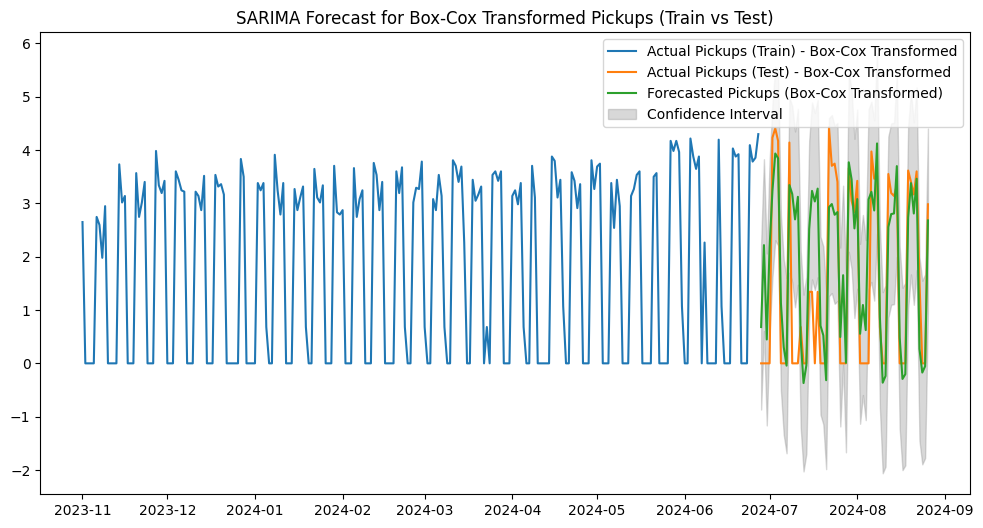

R-squared (Test Data, Box-Cox Transformed): 0.525776738335425


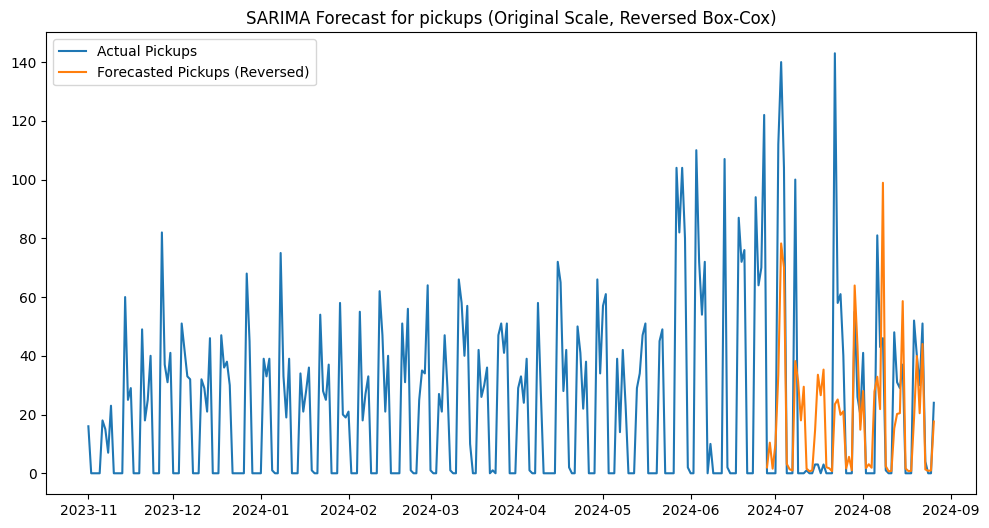

In [54]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Split the data into training and test sets
# Using an 80-20 split ratio for training and testing
split_idx = int(len(df) * 0.8)  # 80% of the data for training
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]
# Define the exogenous variables (exog) for the training data
# This includes the 'scheduled_pickup' column and lagged versions of it (7-day and 14-day lags)
exog_train = train_df[["scheduled_pickup","scheduled_pickup_lag_7",
                       "scheduled_pickup_lag_14"]]


# Define the exogenous variables (exog) for the test data
# Similarly includes 'scheduled_pickup' and its 7-day and 14-day lagged values for the test dataset
exog_test = test_df[["scheduled_pickup","scheduled_pickup_lag_7",
                       "scheduled_pickup_lag_14"]]


# Step 4: Fit a SARIMA Model on the training data using Box-Cox transformed data
# Initialize the SARIMA model with Box-Cox transformed 'actual_pickup' data as the target variable
sarima_model_boxcox = sm.tsa.SARIMAX(
    train_df['actual_pickup_boxcox'],  # Target variable (Box-Cox transformed)
    exog=exog_train,  # Use external regressors (exogenous variables) like scheduled pickup data and its lags
    order=(4, 1, 4),  # Specifies the ARIMA parameters: (p=4, d=1, q=4)
    seasonal_order=(1, 1, 1, 7)  # Specifies the seasonal component: (P=1, D=1, Q=1, seasonality=7 days for weekly pattern)
)

# Fit the SARIMA model to the training data, suppressing output display with disp=False
sarima_fit_boxcox = sarima_model_boxcox.fit(disp=False)

# Print the summary of the SARIMA model fit
print(sarima_fit_boxcox.summary())

# Generate in-sample predictions (fitted values) from the SARIMA model
predictions = sarima_fit_boxcox.fittedvalues

# Step 5: Forecast the test data period using the SARIMA model with Box-Cox transformed data
# Generate forecasts for the same number of steps as the length of the test dataset
forecast_boxcox = sarima_fit_boxcox.get_forecast(steps=len(test_df), exog=exog_test)

# Extract the forecasted values (predicted mean) from the SARIMA model for the test period
forecast_values_boxcox = forecast_boxcox.predicted_mean

# Retrieve the confidence intervals for the forecasts, providing a range of likely values
confidence_intervals_boxcox = forecast_boxcox.conf_int()
# Step 6: Visualize the forecast results using Box-Cox transformed data

# Set up the plot with a specified figure size
plt.figure(figsize=(12, 6))

# Plot the Box-Cox transformed actual pickup values for the training dataset
plt.plot(
    train_df['date'],
    train_df['actual_pickup_boxcox'],
    label='Actual Pickups (Train) - Box-Cox Transformed'
)

# Plot the Box-Cox transformed actual pickup values for the test dataset
plt.plot(
    test_df['date'],
    test_df['actual_pickup_boxcox'],
    label='Actual Pickups (Test) - Box-Cox Transformed'
)

# Plot the forecasted pickup values based on the Box-Cox transformed data for the test period
plt.plot(
    test_df['date'],
    forecast_values_boxcox,
    label='Forecasted Pickups (Box-Cox Transformed)'
)

# Add a shaded area for the confidence intervals around the forecasted values
plt.fill_between(
    test_df['date'],
    confidence_intervals_boxcox.iloc[:, 0],  # Lower bound of the confidence interval
    confidence_intervals_boxcox.iloc[:, 1],  # Upper bound of the confidence interval
    color='gray',
    alpha=0.3,
    label='Confidence Interval'
)

# Add title and legend for clarity
plt.title('SARIMA Forecast for Box-Cox Transformed Pickups (Train vs Test)')
plt.legend()

# Display the plot
plt.show()
y_true_boxcox_test = test_df['actual_pickup_boxcox']
y_pred_boxcox_test = forecast_values_boxcox
r2_boxcox = r2_score(y_true_boxcox_test, y_pred_boxcox_test)
print(f"R-squared (Test Data, Box-Cox Transformed): {r2_boxcox}")
# Step 8: Reverse Box-Cox Transformation to interpret results on the original scale
# Inverse Box-Cox transform the forecasted values
forecast_values_original = inv_boxcox(forecast_values_boxcox, lam)

# Plot the forecast with the original scale reversed transformation
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['actual_pickup'], label='Actual Pickups')
plt.plot(test_df['date'], forecast_values_original, label='Forecasted Pickups (Reversed)')
plt.title('SARIMA Forecast for pickups (Original Scale, Reversed Box-Cox)')
plt.legend()
plt.show()


### 2. Machine learning models.

                             actual_pickup  scheduled_pickup  \
actual_pickup                     1.000000          0.347305   
scheduled_pickup                  0.347305          1.000000   
actual_pickup_boxcox              0.874888          0.271956   
rolling_std_original              0.150783          0.325177   
rolling_std_boxcox                0.157332          0.268249   
scheduled_pickup_lag_7            0.200785          0.460921   
scheduled_pickup_lag_14           0.140847          0.330868   
actual_pickup_boxcox_lag_7        0.521211          0.109729   
actual_pickup_boxcox_lag_14       0.446262          0.090739   

                             actual_pickup_boxcox  rolling_std_original  \
actual_pickup                            0.874888              0.150783   
scheduled_pickup                         0.271956              0.325177   
actual_pickup_boxcox                     1.000000             -0.027109   
rolling_std_original                    -0.027109          

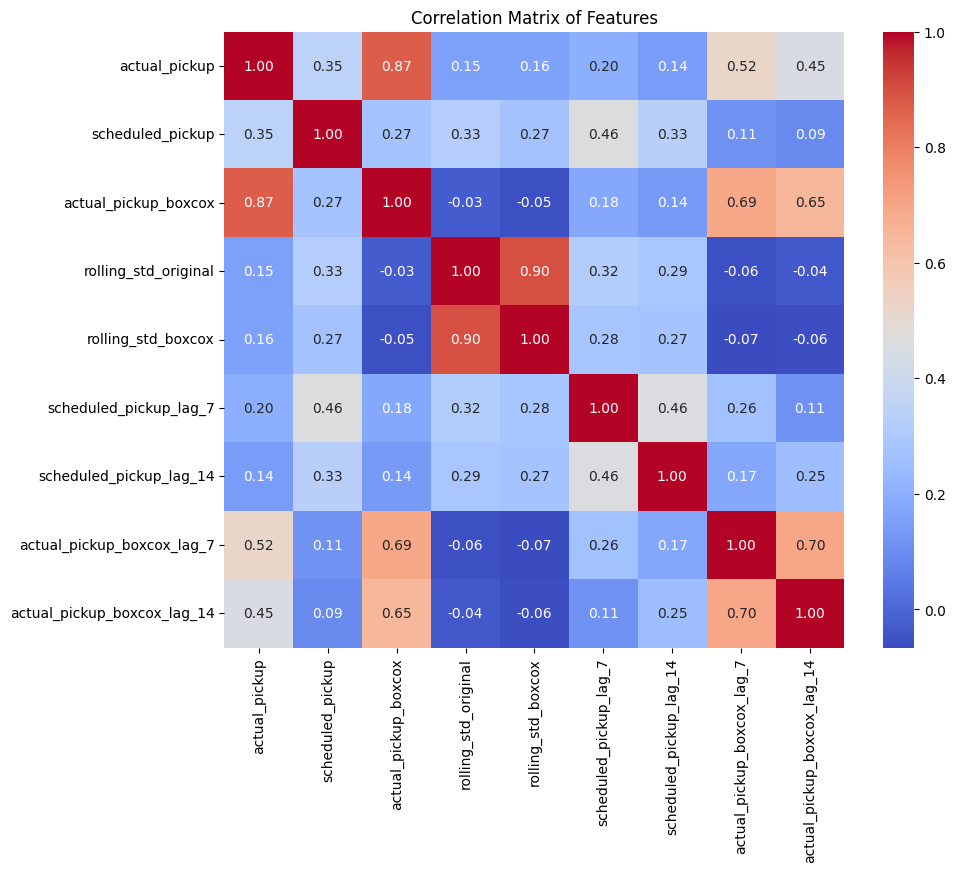

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded as a pandas DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

(Random Forest, XGBoost).

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Extract target and features
target = df['actual_pickup_boxcox']
features = df[['scheduled_pickup',
               'scheduled_pickup_lag_7',
               'actual_pickup_boxcox_lag_7',
               'actual_pickup_boxcox_lag_14']]

# Initialize Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Placeholders for storing MAE and R² scores
mae_scores_rf = []
r2_scores_rf = []

# Iterate through each split
for train_index, test_index in tscv.split(target):
    # Split the data into training and testing sets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]

    # Initialize and fit the Random Forest model
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)

    # Make predictions
    y_pred_rf = model_rf.predict(X_test)

    # Evaluate Random Forest model performance
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    mae_scores_rf.append(mae_rf)
    r2_scores_rf.append(r2_rf)

    # Print the results for this split
    # print(f"Random Forest - Train indices: {train_index}, Test indices: {test_index}, MAE: {mae_rf}, R²: {r2_rf}")

# Final summary
print(f"Mean MAE over all splits: {np.mean(mae_scores_rf)}")
print(f"Mean R² over all splits: {np.mean(r2_scores_rf)}")


Mean MAE over all splits: 0.8846840662402762
Mean R² over all splits: 0.3736421592881484


In [57]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Extract target and features
target = df['actual_pickup_boxcox']
features = df[['scheduled_pickup',
               'scheduled_pickup_lag_7',
               'actual_pickup_boxcox_lag_7',
               'actual_pickup_boxcox_lag_14']]

# Initialize Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Placeholders for storing MAE and R² scores
mae_scores_xgb = []
r2_scores_xgb = []

# Iterate through each split
for train_index, test_index in tscv.split(target):
    # Split the data into training and testing sets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]

    # Initialize and fit the XGBoost model
    model_xgb = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=6)
    model_xgb.fit(X_train, y_train)

    # Make predictions
    y_pred_xgb = model_xgb.predict(X_test)

    # Evaluate XGBoost model performance
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    mae_scores_xgb.append(mae_xgb)
    r2_scores_xgb.append(r2_xgb)

    # Print the results for this split
    # print(f"XGBoost - Train indices: {train_index}, Test indices: {test_index}, MAE: {mae_xgb}, R²: {r2_xgb}")

# Final summary
print(f"Mean MAE over all splits: {np.mean(mae_scores_xgb)}")
print(f"Mean R² over all splits: {np.mean(r2_scores_xgb)}")


Mean MAE over all splits: 0.9799319280079419
Mean R² over all splits: 0.2288481743864957


### Block 3: Model Evaluation & Diagnostics (%25)
Evaluate the performance of your trained model(s) using appropriate metrics and diagnostics and choose the best ones.

Conclusion:

Sarima model is the best model.

### Block 4: Model Deployment (%25)

In [58]:
import joblib

In [59]:
import joblib

joblib.dump(sarima_fit_boxcox, 'sarima_model.pkl')

['sarima_model.pkl']

In [60]:
!pip install gradio joblib numpy

In [61]:
# import gradio as gr
# import joblib
# import numpy as np
# import pandas as pd

# # Load the trained model
# model = joblib.load('sarima_model.pkl')

# def generate_exog(days):
#     """
#     Generate exogenous values for the specified number of days.
#     Replace this with your logic to fetch or estimate exog variables.
#     """
#     future_exog = {
#         "scheduled_pickup": [100 + i * 2 for i in range(days)],
#         "scheduled_pickup_lag_7": [90 + i for i in range(days)],
#         "scheduled_pickup_lag_14": [80 + i for i in range(days)],
#     }
#     return pd.DataFrame(future_exog)

# # Define a prediction function
# def predict_for_days(days):
#     """
#     Predict the total food hampers needed for a specified number of days.
#     Args:
#         days (int): Number of days for which predictions are required.
#     Returns:
#         str: Total predicted food hampers needed.
#     """
#     try:
#         # Generate future exogenous variables
#         future_exog = generate_exog(days)

#         # Forecast using the model
#         predictions = model.forecast(steps=days, exog=future_exog)

#         # Create time steps for plotting
#         time_steps = np.arange(1, days + 1)
#         # Plot the forecast
#         plt.figure(figsize=(8, 5))
#         plt.plot(time_steps, predictions, label="Forecast", marker="o")
#         plt.xlabel("Time Step")
#         plt.ylabel("Predicted Value")
#         plt.title("SARIMA Model Forecast")
#         plt.legend()
#         plt.grid(True)

#         # Save the plot as an image to be returned
#         plt_path = "/tmp/forecast_plot.png"
#         plt.savefig(plt_path)
#         plt.close()
#         return plt_path
#     except Exception as e:
#         return f"Error during prediction: {str(e)}"

# # Define Gradio Interface
# inputs = gr.Number(label="Number of Days", value=1, precision=0)  # Input for number of days
# outputs = gr.Image(label="Predicted Food Hampers")


# app = gr.Interface(
#     fn=predict_for_days,
#     inputs=inputs,
#     outputs=outputs,
#     title="Food Hamper Prediction App",
#     description="This app predicts the total number of food hampers needed for a specified number of days."
# )

# # Launch the app
# if __name__ == "__main__":
#     app.launch(share=True)



Stream lit

In [62]:
!pip install streamlit joblib

In [63]:
import streamlit as st

In [64]:
!pip install streamlit pyngrok

In [65]:
# prompt: i also want to install matplotlifb

!pip install matplotlib

In [66]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import folium
# Load the dataset with a specified encoding
data = pd.read_csv('mergedfoodandclients.csv', encoding='latin1')

# Page 1: Dashboard
def dashboard():
    st.subheader("💡 Abstract:")
    inspiration = '''
Data Quality: It is impossible to exaggerate the significance of data quality. An essential first step in guaranteeing the precision and dependability of our analysis and models was cleaning and preparing the dataset.
Feature Selection: The effectiveness of machine learning models is greatly impacted by the identification of pertinent features. We identified the key variables influencing Ontario rental pricing through iterative experimentation.
Model Evaluation: To appropriately determine a machine learning model's performance and capacity for generalization, a thorough evaluation of the model is necessary. We assessed and improved our models using a range of metrics and methods.
Deployment Obstacles: Scalability, security, and system integration are just a few of the difficulties that come with deploying machine learning models to commercial settings. Working together across several teams and areas of expertise was necessary to address these problems.
Overall, this study offered insightful information about the rental market in Ontario and the practical uses of machine learning methods. It emphasized how crucial it is for data science projects to have interdisciplinary collaboration and ongoing learning.
    '''
    st.write(inspiration)
    st.subheader("👨🏻‍💻 What our Project Does?")
    what_it_does = '''
  The purpose of this research is to use machine learning techniques to perform an extensive examination of the rental market in Ontario, Canada. The project will be broken down into three primary stages: the creation of machine learning (ML) models, deployment, and exploratory data analysis (EDA) and visualization.In order to obtain insights into the trends, patterns, and factors impacting rental pricing in the rental market, a range of statistical approaches and visualization tools will be utilized throughout the EDA phase. In this stage, the rental data will be cleaned and preprocessed, outliers and missing values will be found, and correlations between various factors will be investigated.Using supervised learning methods like regression and classification, predictive models will be constructed throughout the machine learning model building phase in order to forecast rental prices and examine the variables influencing price fluctuations.
  Furthermore, rental market segmentation based on various attributes may be achieved through the use of unsupervised learning techniques such as clustering.In the Deployment phase, the built machine learning models will be made available to customers via a web platform or application. This will enable them to interactively explore insights about the rental market and receive rental price projections based on predetermined criteria.
     '''



# Page 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis():
    st.title("Exploratory Data Analysis")

    # Price Distribution
    # fig = px.scatter(data, x='Size', y='Price', trendline="ols", title='Relationship between Size and Price')
    # st.plotly_chart(fig)
    st.markdown("""
    <iframe width="600" height="450" src="https://lookerstudio.google.com/embed/reporting/b91808fe-0100-4e7f-94d4-957c4fea0c20/page/AtrGE" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>
    """, unsafe_allow_html=True)
# Page 3: Machine Learning Modeling
sarima_model = joblib.load('sarima_model.pkl')

# Function to generate exogenous variables
def generate_exog(days):
    """
    Generate exogenous values for the specified number of days.
    Replace this with your logic to fetch or estimate exog variables.
    """
    future_exog = {
        "scheduled_pickup": [100 + i * 2 for i in range(days)],
        "scheduled_pickup_lag_7": [90 + i for i in range(days)],
        "scheduled_pickup_lag_14": [80 + i for i in range(days)],
    }
    return pd.DataFrame(future_exog)

# Function to predict using SARIMA and plot
def predict_for_days(days):
    """
    Predict the total food hampers needed for a specified number of days and plot.
    """
    try:
        # Generate exogenous variables
        future_exog = generate_exog(days)

        # Forecast using SARIMA model
        predictions = sarima_model.forecast(steps=days, exog=future_exog)

        # Plot the predictions
        time_steps = np.arange(1, days + 1)
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(time_steps, predictions, label="Forecast", marker="o")
        ax.set_xlabel("Time Step")
        ax.set_ylabel("Predicted Value")
        ax.set_title("SARIMA Model Forecast")
        ax.legend()
        ax.grid(True)

        return predictions, fig
    except Exception as e:
        st.error(f"Error during prediction: {str(e)}")
        return None, None

# Page 1: Dashboard
def dashboard():
    st.subheader("💡 Abstract:")
    inspiration = '''
Data Quality: It is impossible to exaggerate the significance of data quality. An essential first step in guaranteeing the precision and dependability of our analysis and models was cleaning and preparing the dataset.
Feature Selection: The effectiveness of machine learning models is greatly impacted by the identification of pertinent features. We identified the key variables influencing Ontario rental pricing through iterative experimentation.
Model Evaluation: To appropriately determine a machine learning model's performance and capacity for generalization, a thorough evaluation of the model is necessary. We assessed and improved our models using a range of metrics and methods.
Deployment Obstacles: Scalability, security, and system integration are just a few of the difficulties that come with deploying machine learning models to commercial settings. Working together across several teams and areas of expertise was necessary to address these problems.
    '''
    st.write(inspiration)

# Page 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis():
    st.title("Exploratory Data Analysis")
    st.markdown("""
    <iframe width="600" height="450" src="https://lookerstudio.google.com/embed/reporting/b91808fe-0100-4e7f-94d4-957c4fea0c20/page/AtrGE" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>
    """, unsafe_allow_html=True)

# Page 3: Machine Learning Modeling
def machine_learning_modeling():
    st.title("Kijiji Rental Price Prediction & Food Hamper Forecasting")

    # Subsection: SARIMA Model for Food Hampers
    st.subheader("Food Hamper Forecasting (SARIMA Model)")
    days = st.number_input("Enter the number of days to forecast:", min_value=1, step=1, value=1)

    if st.button("Predict Food Hampers"):
        predictions, fig = predict_for_days(int(days))
        if fig:
            st.pyplot(fig)
            total_hampers = sum(predictions)
            st.success(f"For {days} days, you will need approximately {int(total_hampers)} food hampers.")

    # Subsection: Kijiji Rental Price Prediction
    st.subheader("Kijiji Rental Price Prediction")
    property_type = st.selectbox("Type of Property", ['Apartment', 'House', 'Condo', 'Townhouse'])
    bedrooms = st.slider("Number of Bedrooms", 1, 5, 2)
    bathrooms = st.slider("Number of Bathrooms", 1, 3, 1)
    size = st.slider("Size (sqft)", 300, 5000, 1000)
    unique_locations = data['CSDNAME'].unique()
    location = st.selectbox("Location", unique_locations)

    if st.button("Predict Rental Price"):
        # Load the trained model including preprocessing
        model = joblib.load('random_forest_regressor_model.pkl')

        # Prepare input data as a DataFrame
        input_df = pd.DataFrame({
            'Type': [property_type],
            'Bedrooms': [bedrooms],
            'Bathrooms': [bathrooms],
            'Size': [size],
            'CSDNAME': [location]
        })

        # Make prediction
        prediction = model.predict(input_df)

        # Map the predicted classes to labels
        price_bins = [0, 1700, 2300, float('inf')]
        price_labels = ['low', 'medium', 'high']
        price_category = pd.cut(prediction, bins=price_bins, labels=price_labels)

        # Display the predictions
        st.success(f"Predicted Rental Price: ${prediction[0]:,.2f}")
        st.success(f"Predicted Price Category: {price_category[0]}")

# Main App Logic
def main():
    st.sidebar.title("Kijiji Community App")
    app_page = st.sidebar.radio("Select a Page", ["Dashboard", "EDA", "ML Modeling", "Community Mapping"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "EDA":
        exploratory_data_analysis()
    elif app_page == "ML Modeling":
        machine_learning_modeling()

if __name__ ==+ "__main__":
    main()

Writing app.py


In [67]:
# prompt: i want to downlaod pipregs

!pip install pipreqs
!pipreqs .

INFO: Not scanning for jupyter notebooks.


In [68]:
# import streamlit as st
# import joblib
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the trained model
# model = joblib.load('sarima_model.pkl')

# def generate_exog(days):
#     """
#     Generate exogenous values for the specified number of days.
#     Replace this with your logic to fetch or estimate exog variables.
#     """
#     future_exog = {
#         "scheduled_pickup": [100 + i * 2 for i in range(days)],
#         "scheduled_pickup_lag_7": [90 + i for i in range(days)],
#         "scheduled_pickup_lag_14": [80 + i for i in range(days)],
#     }
#     return pd.DataFrame(future_exog)

# # Define a prediction function
# def predict_for_days(days):
#     """
#     Predict the total food hampers needed for a specified number of days.
#     Args:
#         days (int): Number of days for which predictions are required.
#     Returns:
#         predictions (np.ndarray): Predicted values.
#     """
#     try:
#         # Generate future exogenous variables
#         future_exog = generate_exog(days)

#         # Forecast using the model
#         predictions = model.forecast(steps=days, exog=future_exog)

#         return predictions
#     except Exception as e:
#         st.error(f"Error during prediction: {str(e)}")
#         return None

# # Streamlit App
# st.title("Food Hamper Prediction App")
# st.write("This app predicts the total number of food hampers needed for a specified number of days.")

# # Input: Number of days
# days = st.number_input("Enter the number of days for prediction:", min_value=1, value=1, step=1)

# # Prediction Button
# if st.button("Predict"):
#     predictions = predict_for_days(days)

#     if predictions is not None:
#         # Plot the predictions
#         time_steps = np.arange(1, days + 1)
#         plt.figure(figsize=(8, 5))
#         plt.plot(time_steps, predictions, label="Forecast", marker="o")
#         plt.xlabel("Time Step")
#         plt.ylabel("Predicted Value")
#         plt.title("SARIMA Model Forecast")
#         plt.legend()
#         plt.grid(True)

#         # Display the plot in Streamlit
#         st.pyplot(plt)

#         # Optionally display the predictions as a table
#         st.write("Predicted Values:")
#         st.dataframe(pd.DataFrame({"Day": time_steps, "Predicted Hampers": predictions}))

In [69]:
# %%writefile app.py
# import streamlit as st
# import joblib
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the trained model
# model = joblib.load('sarima_model.pkl')

# def generate_exog(days):
#     future_exog = {
#         "scheduled_pickup": [100 + i * 2 for i in range(days)],
#         "scheduled_pickup_lag_7": [90 + i for i in range(days)],
#         "scheduled_pickup_lag_14": [80 + i for i in range(days)],
#     }
#     return pd.DataFrame(future_exog)

# def predict_for_days(days):
#     try:
#         future_exog = generate_exog(days)
#         predictions = model.forecast(steps=days, exog=future_exog)
#         return predictions
#     except Exception as e:
#         st.error(f"Error during prediction: {str(e)}")
#         return None

# st.title("Food Hamper Prediction App")
# st.write("This app predicts the total number of food hampers needed for a specified number of days.")

# days = st.number_input("Enter the number of days for prediction:", min_value=1, value=1, step=1)

# if st.button("Predict"):
#     predictions = predict_for_days(days)
#     if predictions is not None:
#         time_steps = np.arange(1, days + 1)
#         plt.figure(figsize=(8, 5))
#         plt.plot(time_steps, predictions, label="Forecast", marker="o")
#         plt.xlabel("Time Step")
#         plt.ylabel("Predicted Value")
#         plt.title("SARIMA Model Forecast")
#         plt.legend()
#         plt.grid(True)
#         st.pyplot(plt)
